In [1]:
import numpy as np
import numpy.random as npr
import math
import matplotlib.pyplot as plt
import timeit

1\. **Reductions**

Find the total mean, and the mean for each row and column of the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [2]:
m = np.arange(12).reshape((3,4))
print(m)
print("Total mean: ", m.mean())
print("Means along columns: ", m.mean(axis = 0))
print("Means along rows: ", m.mean(axis = 1))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Total mean:  5.5
Means along columns:  [4. 5. 6. 7.]
Means along rows:  [1.5 5.5 9.5]


2\. **Outer product**

Find the outer product of the following vectors:

```python
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])
```

Use different methods to do this:

   1. Using the function `outer` in numpy
   2. Using a nested `for` loop or a list comprehension
   3. Using numpy broadcasting operations

In [5]:
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])

# 1. using outer function
op1 = np.outer(u, v)
print("Outer product using outer function: \n", op1)

# 2a. using a nested for loop or a list comprehension
op2 = np.ones((4, 4))
n = u.shape[0]
m = v.shape[0]
for i in range(n):
    for j in range(m):
        op2[i][j] = u[i]*v[j]
print("Outer product using for loop: \n", op2)

# 2b. using a list comprehension
op3 = np.ones((4, 4))
op3 = [u[i]*v[j] for i in range(m) for j in range(n)]
op3 = np.array(op3).reshape(4, 4)
print("Outer product using list comprehension: \n", op3)

# 3. using numpy broadcasting operation
op4 = u.reshape((-1,1)) * v
print("Outer product using broadcasting operation: \n", op4)


Outer product using outer function: 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
Outer product using for loop: 
 [[ 2.  4.  6.  8.]
 [ 6. 12. 18. 24.]
 [10. 20. 30. 40.]
 [14. 28. 42. 56.]]
Outer product using list comprehension: 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
Outer product using broadcasting operation: 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. **Matrix masking**

Create a 10 by 6 matrix of float random numbers, distributed between 0 and 3 according to a flat distribution.

After creating the matrix, set all entries $< 0.3$ to zero using a mask.

In [6]:
matrix = npr.uniform(low = 0.0, high = 3.0, size=(10, 6))
print("10 by 6 matrix: \n", matrix)
mask = (matrix < 0.3)
matrix[mask] = 0
print("\n10 by 6 matrix filtered with mask: \n", matrix)

10 by 6 matrix: 
 [[0.34431081 1.8445712  0.63659277 1.12177491 2.55709733 0.37847299]
 [2.2231307  2.51931317 1.2513551  0.13111042 1.7305436  2.94097586]
 [1.30745162 0.13577466 2.65022363 1.41314807 1.73559026 1.39693804]
 [1.88568064 0.87172572 0.03345273 2.22355357 0.17877585 0.31562085]
 [2.30850235 2.7910736  2.61900721 2.64916264 2.36072222 2.05141419]
 [0.06630959 0.72470587 1.48073657 1.1526311  2.76710951 2.10368843]
 [1.0973401  1.26464249 1.76601519 0.05594898 2.19249462 2.64962454]
 [1.85690094 1.2364104  2.65172564 0.27982136 2.73959847 0.76004207]
 [1.72959689 0.60314313 0.42721264 0.72612146 0.00682177 0.04704373]
 [0.0338223  0.10734298 1.84162753 1.50233106 0.29230503 0.67544302]]

10 by 6 matrix filtered with mask: 
 [[0.34431081 1.8445712  0.63659277 1.12177491 2.55709733 0.37847299]
 [2.2231307  2.51931317 1.2513551  0.         1.7305436  2.94097586]
 [1.30745162 0.         2.65022363 1.41314807 1.73559026 1.39693804]
 [1.88568064 0.87172572 0.         2.22355357 

4\. **Trigonometric functions**

Use `np.linspace` to create an array of 100 numbers between $0$ and $2\pi$ (inclusive).

  * Extract every 10th element using the slice notation
  * Reverse the array using the slice notation
  * Extract elements where the absolute difference between the `sin` and `cos` functions evaluated for that element is $< 0.1$
  * **Optional**: make a plot showing the sin and cos functions and indicate where they are close

Array of 100 numbers between [0, 2pi]:
 [0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5

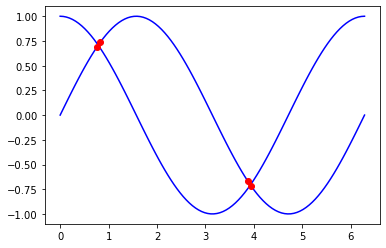

In [7]:
a = np.linspace(0.0, 2*math.pi, 100)
print('Array of 100 numbers between [0, 2pi]:\n', a, '\n')

ar10 = a.reshape(10, 10)[::,9]
print("Extracting every 10th element: \n", ar10, '\n')

a_reversed = a[100::-1]
print('Array reversed:\n', a_reversed, '\n')

listSC = [a[i] for i in range(a.shape[0]) if 
          (abs(math.sin(a[i]) - math.cos(a[i])) < 0.1)]
print("Elements where |sin-cos|<0.1:\n", listSC)

ax = plt.axes()
ax.plot(a, np.sin(a), 'b') 
ax.plot(a, np.cos(a), 'b') 
xval = np.array(listSC)
ax.plot(xval, np.sin(xval), 'or')
plt.show()

5\. **Matrices**

Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anti-diagonal matrix (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagonal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [8]:
dim = 10
matr = np.fromfunction(lambda i, j: (i+1)*(j+1), (dim, dim))
print("10x10 table: \n", matr, '\n')
trace = 0

for i in range(dim):
    trace += matr[i][i]
print("Trace of the matrix:", trace)
#or using trace function: print(matr.trace())

print("Anti-diagonal:", np.fliplr(matr).diagonal())
print("Diagonal offset by 1 upwards:", np.diagonal(matr, offset = 1))

10x10 table: 
 [[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
 [  2.   4.   6.   8.  10.  12.  14.  16.  18.  20.]
 [  3.   6.   9.  12.  15.  18.  21.  24.  27.  30.]
 [  4.   8.  12.  16.  20.  24.  28.  32.  36.  40.]
 [  5.  10.  15.  20.  25.  30.  35.  40.  45.  50.]
 [  6.  12.  18.  24.  30.  36.  42.  48.  54.  60.]
 [  7.  14.  21.  28.  35.  42.  49.  56.  63.  70.]
 [  8.  16.  24.  32.  40.  48.  56.  64.  72.  80.]
 [  9.  18.  27.  36.  45.  54.  63.  72.  81.  90.]
 [ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]] 

Trace of the matrix: 385.0
Anti-diagonal: [10. 18. 24. 28. 30. 30. 28. 24. 18. 10.]
Diagonal offset by 1 upwards: [ 2.  6. 12. 20. 30. 42. 56. 72. 90.]


6\. **Broadcasting**

Use broadcasting to create a grid of distances.

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles.

The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Build a 2D grid of distances among each city along Route 66
  * Convert the distances in km

In [9]:
posMiles = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
distancesMiles = np.triu(posMiles - np.tile(posMiles, (10, 1)).T)
print('Distances between cities in miles:\n',distancesMiles , '\n')
distancesKm = 1.6 * distancesMiles
print('Distances between cities in Km:\n', distancesKm)

Distances between cities in miles:
 [[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [   0    0  105  538  673  977 1277 1346 1715 2250]
 [   0    0    0  433  568  872 1172 1241 1610 2145]
 [   0    0    0    0  135  439  739  808 1177 1712]
 [   0    0    0    0    0  304  604  673 1042 1577]
 [   0    0    0    0    0    0  300  369  738 1273]
 [   0    0    0    0    0    0    0   69  438  973]
 [   0    0    0    0    0    0    0    0  369  904]
 [   0    0    0    0    0    0    0    0    0  535]
 [   0    0    0    0    0    0    0    0    0    0]] 

Distances between cities in Km:
 [[   0.   316.8  484.8 1177.6 1393.6 1880.  2360.  2470.4 3060.8 3916.8]
 [   0.     0.   168.   860.8 1076.8 1563.2 2043.2 2153.6 2744.  3600. ]
 [   0.     0.     0.   692.8  908.8 1395.2 1875.2 1985.6 2576.  3432. ]
 [   0.     0.     0.     0.   216.   702.4 1182.4 1292.8 1883.2 2739.2]
 [   0.     0.     0.     0.     0.   486.4  966.4 1076.8 1667.2 2523.2]
 [   0.     0.     0.     0.     

7\. **Prime numbers sieve**

Compute the prime numbers in the 0-N (start with N=99) range with a sieve (mask).

  * Constract a shape (N,) boolean array, which is the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (with `timeit`); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [10]:
def primeNumbers(N):
    arr = np.arange(2, N)
    msk = (arr % 2 != 0)
    msk[0] = True
    arr = arr[msk]
    msk = msk[msk]
    for j in arr[arr > 2]:
       # all prime numbers are greater than 1
       for i in arr[arr < j]:
            if (j % i) == 0:
                arr = arr[arr != j]
                break
    return arr

def primeNumbersEratostenes(N):
    arr = np.arange(2, N)
    msk = (arr % 2 != 0)
    #msk[0] = True
    arr = arr[msk]
    msk = msk[msk]
    primes = np.array([2])
    while arr.shape[0]:
        p = arr[0]
        arr = arr[arr % p != 0]
        
        primes =  np.append(primes, p)

    return primes

print(primeNumbers(99))
print(primeNumbersEratostenes(99))

mysetup = "import numpy as np"
myprimeNumberCode = '''
def primeNumbers(N):
    arr = np.arange(2, N)
    msk = (arr % 2 != 0)
    msk[0] = True
    arr = arr[msk]
    msk = msk[msk]
    for j in arr[arr > 2]:
       # all prime numbers are greater than 1
       for i in arr[arr < j]:
            if (j % i) == 0:
                arr = arr[arr != j]
                break
    return arr
primeNumbers(99)
'''

myprimeNumberCodeEratostenes = '''
def primeNumbersEratostenes(N):
    arr = np.arange(2, N)
    msk = (arr % 2 != 0)
    #msk[0] = True
    arr = arr[msk]
    msk = msk[msk]
    primes = np.array([2])
    while arr.shape[0]:
        p = arr[0]
        arr = arr[arr % p != 0]
        
        primes =  np.append(primes, p)

    return primes
primeNumbersEratostenes(99)
'''

print("Execution time", timeit.timeit(stmt=myprimeNumberCode, setup = mysetup, number=1000))
print("Execution time", timeit.timeit(stmt=myprimeNumberCodeEratostenes, setup = mysetup, number=1000))

# primeNumbers is quadratic qith N while the optimization in the sieve of Eratosthenes is linear with N

[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
Execution time 0.3465966999999921
Execution time 0.28881950000000245


8\. **Diffusion using random walk**

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of many random walkers after a given amount of time.

*Hint*: create a 2D array where each row represents a walker, and each column represents a time step.

  * Take 1000 walkers and let them walk for 200 steps
  * Use `randint` to create a 2D array of size $walkers \times steps$ with values -1 or 1
  * Calculate the walking distances for each walker (e.g. by summing the elements in each row)
  * Take the square of the previously-obtained array (element-wise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * **Optional**: plot the average distances ($\sqrt(distance^2)$) as a function of time (step)

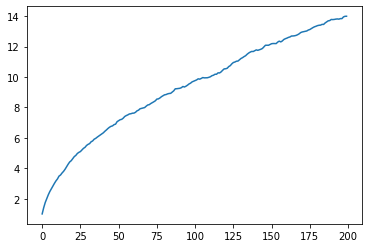

In [11]:
walkers = 2 * np.random.randint(2, size=(1000, 200)) - 1
walkersDistance = walkers.sum(axis = 1)
walkersDistanceSquare = np.square(walkersDistance)
walkersDistances = np.cumsum(walkers, axis = 1)
walkersDistancesSquared = np.square(walkersDistances)
walkersDistancesSquaredMean = walkersDistancesSquared.mean(axis = 0)
dist = np.sqrt(walkersDistancesSquaredMean)
plt.plot(dist)
plt.show()